#**Online review Spammers**

Bharath Kumar Suroju , Sainath Reddy Yaramada, Anand Sagar Pandrapagada, Logan Falkensten

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Afinn.csv to Afinn (2).csv
Saving Movie_review.csv to Movie_review (2).csv


In [0]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [0]:
movie_review = pd.read_csv(r"Movie_review.csv") #data file chosen, can be swapped out with any CSV format review score file

In [0]:
df = pd.DataFrame(movie_review)
df.head()

,productId,userId,profileName,helpfulness,review_score,review_time,review_summary,text
0,B002OHDRF2,A2ATWKOFJXRRR1,B. Merritt filmreviewstew.com,2/6,2.0,1263859200,Been There. Done That.,Judgment Day</a> in which a Termina...
1,B002OHDRF2,A1W6I2VUOWRE56,Mohammad Saadat hashem,2/6,5.0,1256256000,leave it alone!!,this is a great movie of course i...
2,B002OHDRF2,A2Y2L2TRP2Q4AS,Jennifer L Kehs,4/10,5.0,1249344000,best Terminator movie!,D Saw the film 4 times in the th...
3,B002OHDRF2,AGC3LQMMYX1RY,Joseph M. Day JOJO77,4/10,5.0,1243555200,this is an awsome movie to see. a...,this movie is the best ever seen. ...
4,B002OHDRF2,A12Q0LLN5R2XAG,MONTY,0/3,5.0,1276646400,TERMINATOR SALVATION,product was in excellent condition. ...


Punkt Sentence Tokenizer: This tokenizer divides a text into a list of sentences, by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences. It must be trained on a large collection of plaintext in the target language before it can be used.

In [0]:
from nltk import word_tokenize,sent_tokenize

In [0]:
df["tokenized_text"] = df["text"].apply(word_tokenize)

In [0]:
df.head()

,productId,userId,profileName,helpfulness,review_score,review_time,review_summary,text,tokenized_text
0,B002OHDRF2,A2ATWKOFJXRRR1,B. Merritt filmreviewstew.com,2/6,2.0,1263859200,Been There. Done That.,Judgment Day</a> in which a Termina...,"[Judgment, Day, <, /a, >, in, which, a, Termin..."
1,B002OHDRF2,A1W6I2VUOWRE56,Mohammad Saadat hashem,2/6,5.0,1256256000,leave it alone!!,this is a great movie of course i...,"[this, is, a, great, movie, of, course, it, is..."
2,B002OHDRF2,A2Y2L2TRP2Q4AS,Jennifer L Kehs,4/10,5.0,1249344000,best Terminator movie!,D Saw the film 4 times in the th...,"[D, Saw, the, film, 4, times, in, the, theater..."
3,B002OHDRF2,AGC3LQMMYX1RY,Joseph M. Day JOJO77,4/10,5.0,1243555200,this is an awsome movie to see. a...,this movie is the best ever seen. ...,"[this, movie, is, the, best, ever, seen, ., we..."
4,B002OHDRF2,A12Q0LLN5R2XAG,MONTY,0/3,5.0,1276646400,TERMINATOR SALVATION,product was in excellent condition. ...,"[product, was, in, excellent, condition, ., sh..."


In [0]:
stop =['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [0]:
def rmstopwords(y):
  A = []
  for i in y:
    if i not in stop:
      A.append(i)   
  return A

In [0]:
lista=df['tokenized_text']
listb=[]
for item in lista:
    b = rmstopwords(item)
    listb.append(b)   
df['text_without_keywords']=listb

In order to calicualte the sentiment score. AFINN is a list of english words rated for valence with an integer between minus five (negative) and plus five (positive).

In [0]:
afinn = pd.read_csv(r"Afinn.csv",encoding = "ISO-8859-1")
df_afinn = pd.DataFrame(afinn)
df_afinn.head()

,Word,Score
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [0]:
afinn_dict = dict(zip(df_afinn.Word,df_afinn.Score))

In [0]:
def sentiment_score(array):
  A = []
  for i in array:
    if i in afinn_dict:
      A.append(afinn_dict[i])
    else:
      A.append(0)
  return A

In [0]:
lista = df["text_without_keywords"]
listb = []
listc = []
#print(lista)
for arrays in lista:
    listb = sentiment_score(arrays)
    listc.append(np.sum(listb))
df["sentiment_scores"] = listc

In [0]:
df["sentiment_scores"].head()

0     4
1    10
2     0
3     3
4     3
Name: sentiment_scores, dtype: int64

In [0]:
df["sentiment_scores"].describe()

count    201.000000
mean       6.373134
std       10.987041
min      -13.000000
25%        0.000000
50%        4.000000
75%       10.000000
max       74.000000
Name: sentiment_scores, dtype: float64

In [0]:
# from above stats
average = df["sentiment_scores"].mean()
stddev = df["sentiment_scores"].std()
#Caliculating upper and lower threshold values for sentimental score
upperthreshold = float(average)+0.5*float(stddev) # Here we set threshold vaue within 0.5 standard deviations from the mean.
lowerthreshold = float(average)-0.5*float(stddev)
print("Upper threshold values is {} and Lower threshold value is {} ".format(upperthreshold,lowerthreshold))

Upper threshold values is 11.866654935101796 and Lower threshold value is 0.8796137216146223 


In [0]:
# Classifying reviews into spammer and non spammers
def spammer(sentiment_scores):
  if(sentiment_scores > upperthreshold):
    return float(0)
  elif(sentiment_scores < lowerthreshold):
    return float(0)
  else:
    return float(1)

In [0]:
sentiment_sc_a =  df["sentiment_scores"]
sentiment_sc_b = []
for item in sentiment_sc_a:
  result = spammer(item)
  sentiment_sc_b.append(result)
df["Label"] = sentiment_sc_b

In [0]:
df.head()

,productId,userId,profileName,helpfulness,review_score,review_time,review_summary,text,tokenized_text,text_without_keywords,sentiment_scores,Label
0,B002OHDRF2,A2ATWKOFJXRRR1,B. Merritt filmreviewstew.com,2/6,2.0,1263859200,Been There. Done That.,Judgment Day</a> in which a Termina...,"[Judgment, Day, <, /a, >, in, which, a, Termin...","[Judgment, Day, <, /a, >, Terminator, gets, fr...",4,1.0
1,B002OHDRF2,A1W6I2VUOWRE56,Mohammad Saadat hashem,2/6,5.0,1256256000,leave it alone!!,this is a great movie of course i...,"[this, is, a, great, movie, of, course, it, is...","[great, movie, course, james, cameron, movie, ...",10,1.0
2,B002OHDRF2,A2Y2L2TRP2Q4AS,Jennifer L Kehs,4/10,5.0,1249344000,best Terminator movie!,D Saw the film 4 times in the th...,"[D, Saw, the, film, 4, times, in, the, theater...","[D, Saw, film, 4, times, theater, !, !]",0,0.0
3,B002OHDRF2,AGC3LQMMYX1RY,Joseph M. Day JOJO77,4/10,5.0,1243555200,this is an awsome movie to see. a...,this movie is the best ever seen. ...,"[this, movie, is, the, best, ever, seen, ., we...","[movie, best, ever, seen, ., waiting, long, ti...",3,1.0
4,B002OHDRF2,A12Q0LLN5R2XAG,MONTY,0/3,5.0,1276646400,TERMINATOR SALVATION,product was in excellent condition. ...,"[product, was, in, excellent, condition, ., sh...","[product, excellent, condition, ., shop, confi...",3,1.0


In [0]:
def tofloat(helpfulness):
  helpful = helpfulness.replace(" ","").split("/")
  if float(helpful[1])==0:
    helpful[1]=1
  helpfulscore = float(helpful[0])/float(helpful[1])
  return helpfulscore

In [0]:
helpfulness_a = df['helpfulness']
helpfulness_b = []
for item in helpfulness_a:
  helpfulness_c = tofloat(item)
  helpfulness_b.append(helpfulness_c)
df["helpfulness_final_score"] = helpfulness_b

In [0]:
df.head()

,productId,userId,profileName,helpfulness,review_score,review_time,review_summary,text,tokenized_text,text_without_keywords,sentiment_scores,Label,helpfulness_final_score
0,B002OHDRF2,A2ATWKOFJXRRR1,B. Merritt filmreviewstew.com,2/6,2.0,1263859200,Been There. Done That.,Judgment Day</a> in which a Termina...,"[Judgment, Day, <, /a, >, in, which, a, Termin...","[Judgment, Day, <, /a, >, Terminator, gets, fr...",4,1.0,0.333333
1,B002OHDRF2,A1W6I2VUOWRE56,Mohammad Saadat hashem,2/6,5.0,1256256000,leave it alone!!,this is a great movie of course i...,"[this, is, a, great, movie, of, course, it, is...","[great, movie, course, james, cameron, movie, ...",10,1.0,0.333333
2,B002OHDRF2,A2Y2L2TRP2Q4AS,Jennifer L Kehs,4/10,5.0,1249344000,best Terminator movie!,D Saw the film 4 times in the th...,"[D, Saw, the, film, 4, times, in, the, theater...","[D, Saw, film, 4, times, theater, !, !]",0,0.0,0.400000
3,B002OHDRF2,AGC3LQMMYX1RY,Joseph M. Day JOJO77,4/10,5.0,1243555200,this is an awsome movie to see. a...,this movie is the best ever seen. ...,"[this, movie, is, the, best, ever, seen, ., we...","[movie, best, ever, seen, ., waiting, long, ti...",3,1.0,0.400000
4,B002OHDRF2,A12Q0LLN5R2XAG,MONTY,0/3,5.0,1276646400,TERMINATOR SALVATION,product was in excellent condition. ...,"[product, was, in, excellent, condition, ., sh...","[product, excellent, condition, ., shop, confi...",3,1.0,0.000000


#Splitting data into Train and Test

In [0]:
from sklearn.model_selection import train_test_split
a,b,c,d = np.array(df['text']), np.array(df['review_score']), np.array(df['sentiment_scores']), np.array(df['helpfulness_final_score'])
all_data = np.concatenate([a.reshape(len(df['text']),1),b.reshape(len(df['text']),1),c.reshape(len(df['text']),1),d.reshape(len(df['text']),1)], axis=1)
X, y = all_data, list(df['Label'])
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2)

#Performing count vectorization for the text

In [0]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix

cv = CountVectorizer(min_df=2)
cv.fit(X_train[:,0])
X_train_cv = cv.transform(X_train[:,0])
X_test_cv = cv.transform(X_test[:,0])

train = np.concatenate([csr_matrix.toarray(X_train_cv),X_train[:,1:]],axis=1)
test = np.concatenate([csr_matrix.toarray(X_test_cv),X_test[:,1:]],axis=1)

#Prediction using RandomForest Classifier

In [0]:
import warnings
warnings.filterwarnings('ignore') # To ignore warning messages

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=50)
RF.fit(train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
from sklearn.model_selection import cross_val_score
accuracies_RF = cross_val_score(estimator = RF, X = train, y = y_train, cv= 5)
print("Accuracies of logistic regression ->",accuracies_RF)
print("Mean of all accuracies -> ",accuracies_RF.mean())

Accuracies of logistic regression -> [0.76 0.61 0.84 0.84 0.81]
Mean of all accuracies ->  0.7705095307917889


In [0]:
grid_parameters = {'n_estimators' : [10*i for i in range(1,10)]  }

In [0]:
from sklearn.model_selection import GridSearchCV
RF_grid_search = GridSearchCV(estimator = RF,
                          param_grid = grid_parameters,
                          scoring = 'accuracy',
                          cv = 5, n_jobs = -1)

In [0]:
RF_grid_search.fit(train,y_train)
best_parameters_of_RF = RF_grid_search.best_params_
print("Best values for the parameters -> ",best_parameters_of_RF)
best_score_of_RF = RF_grid_search.best_score_
print("Best score for the search parameters -> ",best_score_of_RF)

Best values for the parameters ->  {'n_estimators': 90}
Best score for the search parameters ->  0.8


In [0]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=90)
RF.fit(train, y_train)
prediction_RF = RF.predict(test)
print("final accuracy:", metrics.accuracy_score(prediction_RF, y_test))

final accuracy: 0.8292682926829268


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7feb11c652e8>)

<Figure size 432x288 with 0 Axes>

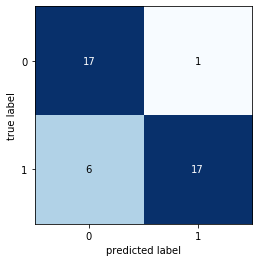

In [0]:
# confusion matrix for Random forest
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cnf_matrix = confusion_matrix(y_test,prediction_RF)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix)

#Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(penalty  = 'l1', C=0.01, solver='liblinear')
LR.fit(train,y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from sklearn.model_selection import cross_val_score
accuracies_LR = cross_val_score(estimator = LR, X = train, y = y_train, cv= 5)
print("Accuracies of logistic regression ->",accuracies_LR)
print("Mean of all accuracies -> ",accuracies_LR.mean())

Accuracies of logistic regression -> [0.55 0.55 0.53 0.55 0.55]
Mean of all accuracies ->  0.5437866568914955


In [0]:
grid_parameters = {'C' : [10**i for i in range(-5,6)]  }

In [0]:
from sklearn.model_selection import GridSearchCV
LR_grid_search = GridSearchCV(estimator = LR,
                          param_grid = grid_parameters,
                          scoring = 'accuracy',
                          cv = 5, n_jobs = -1)

In [0]:
LR_grid_search.fit(train,y_train)
best_parameters_of_LR = LR_grid_search.best_params_
print("Best values for the parameters -> ",best_parameters_of_LR)
best_score_of_LR = LR_grid_search.best_score_
print("Best score for the search parameters -> ",best_score_of_LR)

Best values for the parameters ->  {'C': 0.1}
Best score for the search parameters ->  0.58125


In [0]:
from sklearn import metrics
LR = LogisticRegression(penalty = 'l1',C=0.1, solver='liblinear')
LR.fit(train,y_train)
prediction_LR = LR.predict(test)
print("final accuracy:", metrics.accuracy_score(prediction_LR, y_test))

final accuracy: 0.5365853658536586


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7feb11c4cd68>)

<Figure size 432x288 with 0 Axes>

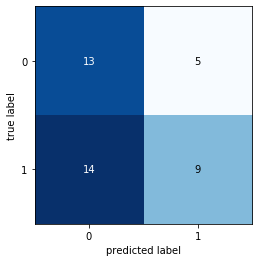

In [0]:
# confusion matrix for Logistic Regression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cnf_matrix = confusion_matrix(y_test,prediction_LR )
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix)